## Dependencies Required

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import datetime as dt

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import datetime as dt
from pandas.plotting import table

#### Create Engine - Call hawaii.sqlite - Reflect Existing DB & Tables

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

#### Assing References to Each Table & Create Session Link

In [3]:
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)

## Analyze Rainfall

In [4]:
last_date = session.query(func.max(Measurement.date)).first()
last_date

('2017-08-23',)

Text(0, 0.5, 'Inch Total')

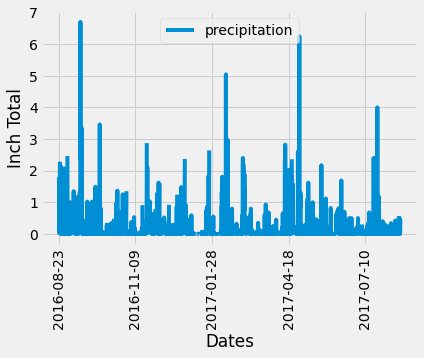

In [5]:
#Hardcode "last_date"

prev_yr = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Call Rainfall Amounts
rainfall = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_yr).all()

# Create DataFrame
df1 = pd.DataFrame(rainfall, columns=['date', 'precipitation'])

# Sort by Date
df1 = df1.sort_values('date')

# MatPlotLib
df1.plot(x='date', y='precipitation', rot=90)
plt.xlabel("Dates")
plt.ylabel("Inch Total")

#### Summary of DF1

In [6]:
df1.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Analyze Station

In [7]:
session.query(func.count(Station.station)).all()

[(9,)]

#### Most Active Stations and by Order

In [8]:
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

#### Most Active Station Query

In [9]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

#### Plot Most Active Station Data

Text(0.5, -1.340000000000014, 'Temp')

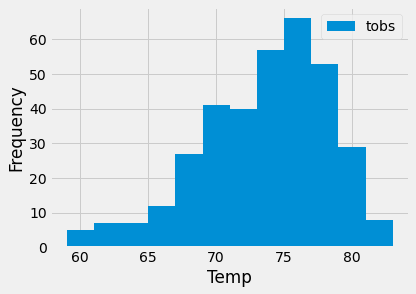

In [10]:
prev_yr1 = dt.date(2017, 8, 23) - dt.timedelta(days=365)

results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_yr1).all()
df2 = pd.DataFrame(results, columns=['tobs'])
df2.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temp")

In [11]:
session.close()